In [3]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
import string
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

    * df = Original Dataset w/o any changes
    * df2 = Dataset copied from df and all changes made in these drop, duplicates, ouliers removal
    * df3 = Dataset copied from df2_dummy Dataset all model building w/o scaling data.
    * df2_dummy = Dataset with dummy encoding and with scaling of data for model building.

In [4]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.5
Matplotlib version: 3.4.3


### Problem 1:

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.
#### In this problem, various machine learning models are built and tested of survey data collected for 1525 voters across 9 variables. The models built include Logistic Regression, LDA, KNN, Naïve Bayes, Random Forest, Boosting etc. and then checking their performances using several performance metrics.

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 
## Exploratory Data Analysis
#### Now, reading the head and tail of the dataset to check whether data has been properly fed.

In [5]:
df = pd.read_csv('Election_Data.csv')
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
df.shape

(1525, 10)

#### We can observe that shape of Dataset comprises of 1525 observations and 10 variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


#### The data has 1525 instances with 10 attributes - 8 integer type and 2 object type as evident from the above result. Above o/p shows that the dataset consists of 2 categorical and 8 continuous variables.
#### Check for the Missing Values
#### There is always a necessity to check the presence of Null Values in dataset as that may lead us to inefficiency or errors in evaluation.
#### Column 'Unnamed:0' needs to be deleted as it cannot be used in analysis.

In [9]:
df.isnull().sum()
print("There are", df.isnull().values.sum(),"Missing Values in dataset")

There are 0 Missing Values in dataset


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


#### We will find unique values in categorical data

In [11]:
for column in df.columns: 
    if df[column].dtype == 'object': 
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts())
        print('\n')

VOTE :  2
Labour          1063
Conservative     462
Name: vote, dtype: int64


GENDER :  2
female    812
male      713
Name: gender, dtype: int64




#### • There are 2 types of voting parties- Labour and Conservative.Vote count for Labour Party is 1063 and votecount for Conservative party is 462.
#### • There are 713 Male voters and 812 Female voters, we can see that there are higher count of Females voters.
### Checking for Duplicates

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


#### There are only 8 duplicated records in the data set, we can remove these records from the data set as they might not be adding any additional value and dropping these may provide distinct records only.

In [13]:
df2 = df.copy()

In [14]:
df2.drop_duplicates(inplace=True)
print('Number of rows after removing duplicated records = %d' % df2.shape[0],'.')
print('Number of columns after removing duplicated records = %d' % df2.shape[1],'.')

Number of rows after removing duplicated records = 1517 .
Number of columns after removing duplicated records = 9 .


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inference:
#### • After dropping "Unnamed: 0", data now contains 1525 rows and 9 columns
#### • Table 8 conﬁrms presence of unique value counts for variables “vote” and “gender”.
#### • There are 2 types of voting parties- Labour and Conservative. From Table 8 top party seems to be the LabourParty.
#### • There are 2 types of genders voting- Male and Female with Female being the top most voters (Table 8).
#### • Minimum age of an individual voting is 24 years and maximum age is 93 years. Mean voting age is 54 years.
#### • Minimum assessment of current national economic conditions is 1 and a maximum assessment is 5 with anaverage assessment of 3.
#### • Minimum assessment of current household economic conditions 1 and a maximum assessment is 5 with anaverage assessment of 3.
#### • Minimum assessment of the Labour leader Tony Blair is 1 and maximum assessment is 5 with an averageassessment of 4.
#### • Minimum assessment of the Conservative leader William Hague is 1 and maximum r assessment is 5 with anaverage assessment of 2.
#### • 75% of the voters on a 11-point scale that measures respondents attitudes toward European integrationrepresent high ‘Eurosceptic’ sentiment with a maximum scale of 11 and a minimum scale.
#### • On an average knowledge of parties positions on European integration is 2. Approximately 25% of parties donot hold positions on European integration with a maximum holding of 3.

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

## Exploratory Data Analysis
### Find the Outliers for continuous variables.

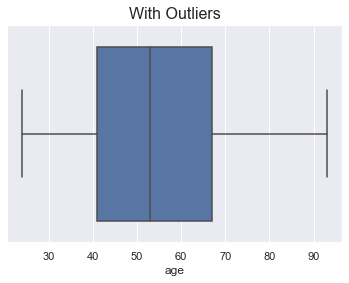

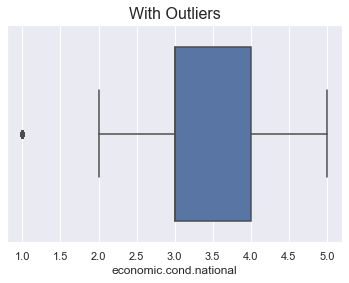

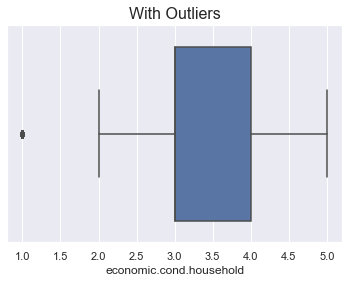

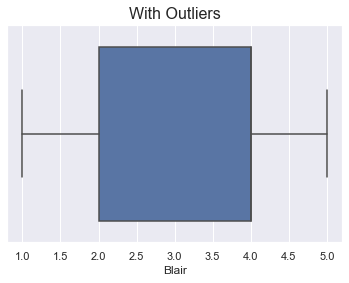

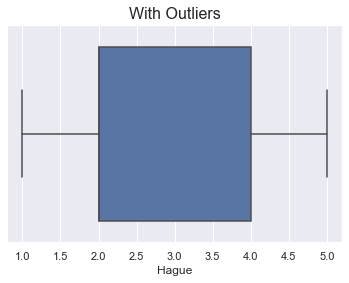

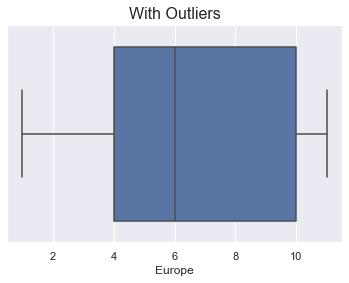

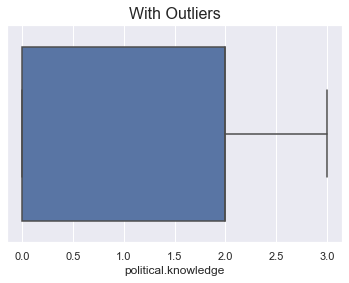

In [16]:
cols=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge'];

for i in cols:
    sns.boxplot(df2[i])
    plt.title('With Outliers',fontsize=16)
    plt.show()

In [17]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr = q3 - q1
((df2<(q1 -(1.5 * iqr)))|(df2>(q3 +(1.5 * iqr)))).sum()

Blair                       0
Europe                      0
Hague                       0
age                         0
economic.cond.household    65
economic.cond.national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

#### There are no outliers in the dataset except in Economic_cond_national (37 outliers, i.e. 2.43% of the data) and Economic_cond_household (65 outliers, i.e. 4.26% of the data).
#### There are three common approaches for converting ordinal and categorical variables to numerical values. They are: 
#### • Ordinal Encoding • One-Hot Encoding • Dummy Variable Encoding
#### We know that two categorical variables, Vote and Gender are present in dataset. Convert categorical to dummy variables as Categorical values cannot be given in the regression models. Hence, we will encode categorical values to an integer by converting categorical to dummy variables.

In [18]:
df2.select_dtypes(include='object').head(10)

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male
5,Labour,male
6,Labour,male
7,Labour,male
8,Labour,female
9,Labour,male


In [19]:
df2_dummy = pd.get_dummies(df2, columns=['vote','gender'],drop_first=True)
df2_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


### Removal of the Outliers for continuous variables.

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in df2_dummy.columns:
    lr,ur=remove_outlier(df2_dummy[column])
    df2_dummy[column]=np.where(df2_dummy[column]>ur,ur,df2_dummy[column])
    df2_dummy[column]=np.where(df2_dummy[column]<lr,lr,df2_dummy[column])

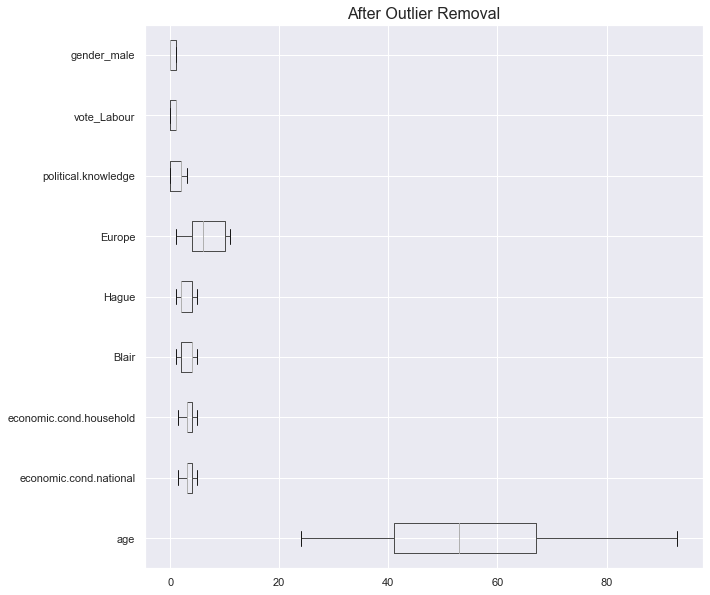

Shape After Outliers Treatment (1517, 9)


In [22]:
plt.figure(figsize=(10,10))
df2_dummy.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

print('Shape After Outliers Treatment',df2_dummy.shape)

### Univariate Analysis
#### Let us define a function 'UnivariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.
#### The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary.

In [23]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()

In [24]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


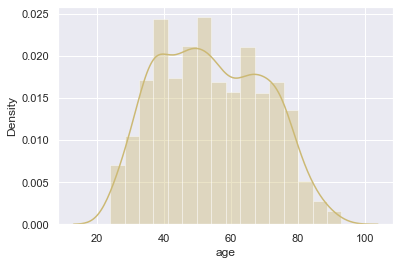

BoxPlot of age
----------------------------------------------------------------------------


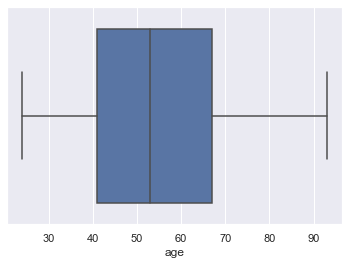

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Distribution of economic.cond.national
----------------------------------------------------------------------------


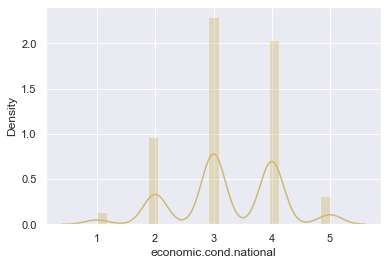

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


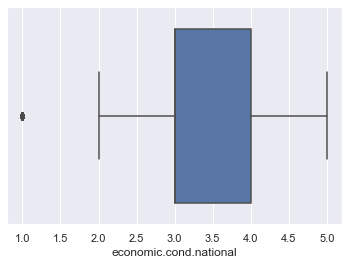

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Distribution of economic.cond.household
----------------------------------------------------------------------------


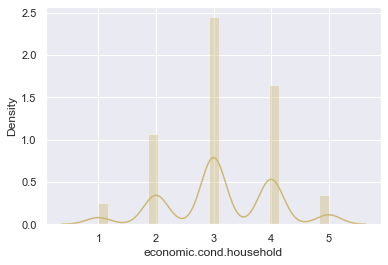

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


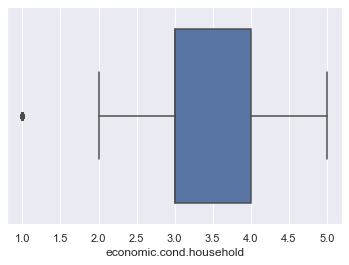

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


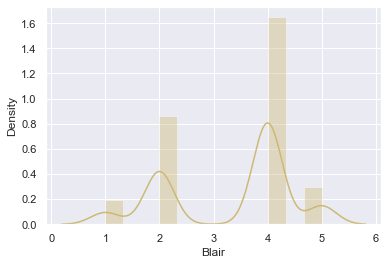

BoxPlot of Blair
----------------------------------------------------------------------------


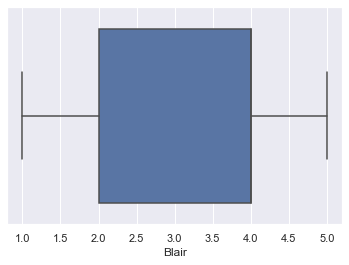

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


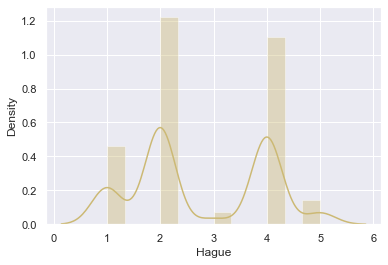

BoxPlot of Hague
----------------------------------------------------------------------------


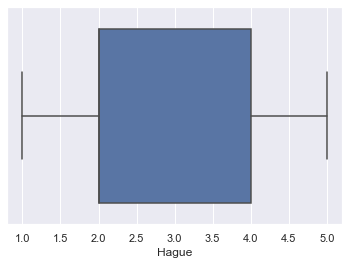

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


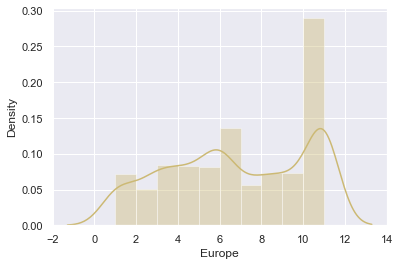

BoxPlot of Europe
----------------------------------------------------------------------------


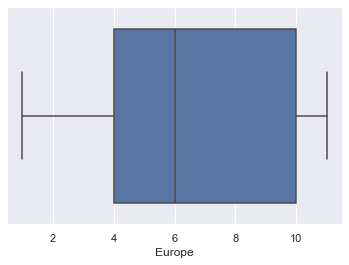

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Distribution of political.knowledge
----------------------------------------------------------------------------


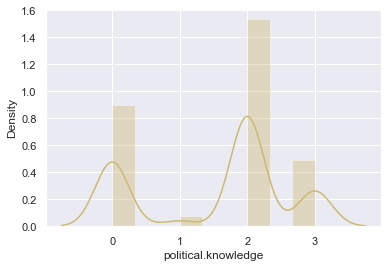

BoxPlot of political.knowledge
----------------------------------------------------------------------------


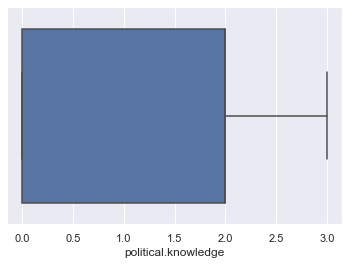

In [25]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [26]:
df_num.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

#### Distribution is skewed to left tail for all the variable except for variables age and Hague, which has right tail

In [27]:
df2['political.knowledge'].value_counts(normalize=True)

2    0.511536
0    0.299275
3    0.164140
1    0.025049
Name: political.knowledge, dtype: float64

In [28]:
df2['economic.cond.national'].value_counts(normalize=True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64

In [29]:
df2['Blair'].value_counts(normalize=True)

4    0.549110
2    0.286091
5    0.100198
1    0.063942
3    0.000659
Name: Blair, dtype: float64

In [30]:
df2['Hague'].value_counts(normalize=True)

2    0.406724
4    0.367172
1    0.153593
5    0.048121
3    0.024390
Name: Hague, dtype: float64

In [31]:
df2['Europe'].value_counts(normalize=True)

11    0.222808
6     0.136454
3     0.084377
4     0.083059
5     0.081081
9     0.073171
8     0.073171
1     0.071852
10    0.066579
7     0.056691
2     0.050758
Name: Europe, dtype: float64

In [32]:
df2['economic.cond.household'].value_counts(normalize=True)

3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic.cond.household, dtype: float64

#### • Performing Univariate Analysis on column 'Age' we can see that Maximum Voters are in age bracket 40-60
#### • Performing Univariate Analysis on column 'economic.cond.national' we can see that Maximum Voters have an average assessment of national economic conditions as majority of voters fall in 3 and 4 bucket.
#### • Performing Univariate Analysis on column 'economic.cond.household' we can see that Maximum Voters have an average assessment of household economic conditions as majority of voters fall in 3 and 4 bucket.
#### • Performing Univariate Analysis on column 'Blair' we can see that Maximum Voters have enough but good assessment of Labour Leaders as majority falls under bucket 4 with 55%.
#### • Performing Univariate Analysis on column 'Hague' we can see that Maximum Voters 41% have low but not poor assessment of Conservative Leader on other hand 37% have a good assesment of the same. 
#### • Performing Univariate Analysis on column 'Europe' it is very clear that majority of voters have Eurosceptic sentiments.
#### • Performing Univariate Analysis on column 'political.knowledge' we can see that Maximum Voters(51%) have fair awareness of the parties whereas around 29% of voters are not at all aware of the same.

### Bivariate Analysis

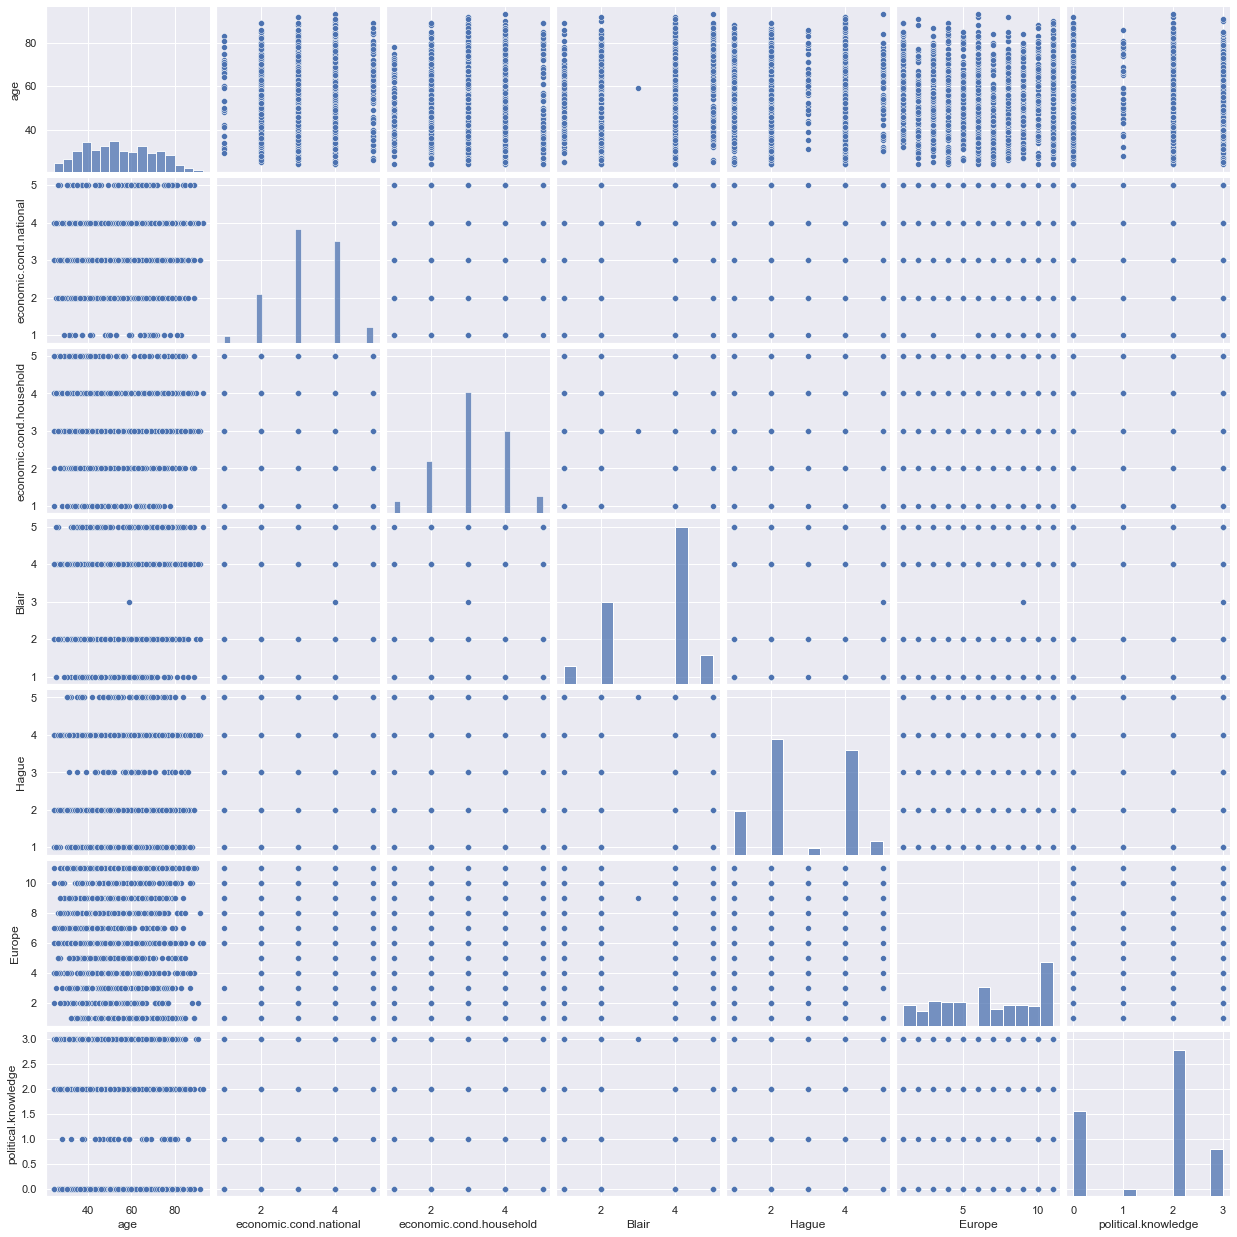

In [33]:
sns.pairplot(df2)
plt.show()

### Find the Correlation between variables

In [34]:
df2.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


### Correlation Heatmap

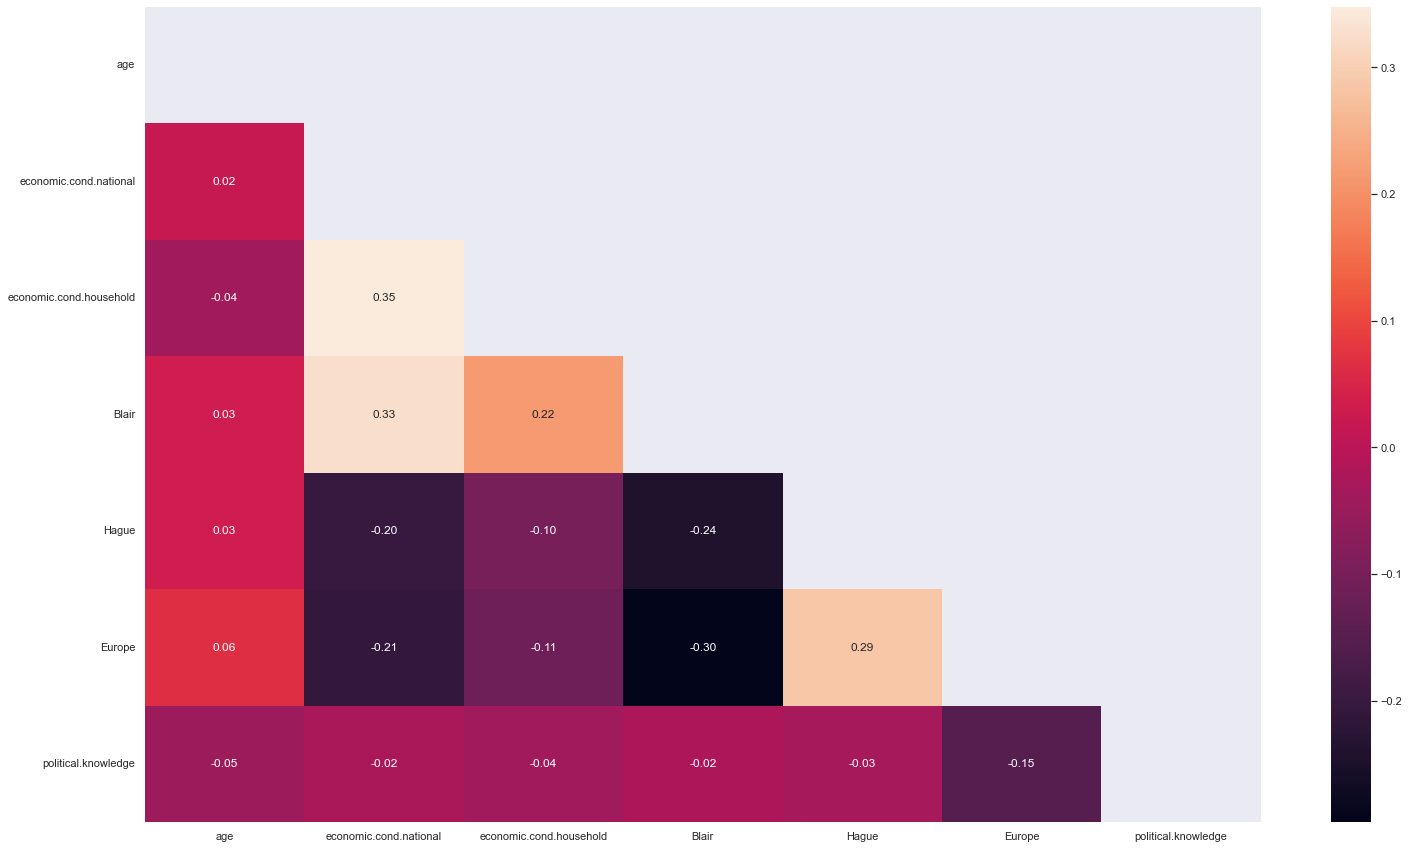

In [35]:
corrl = df2.corr(method='pearson')
mask1 = np.triu(np.ones_like(corrl, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df2.corr(), annot=True,fmt='.2f',mask=mask1)
plt.show()

#### Overall the categories in the data do not look very well correlated. Listing down a few observations from Heatmap below:
#### • Negative Correlation is an indication that mentioned variables move in the opposite direction whoever is voting for Blair is obviously not voting for Hague.Hence there is a negative correlation between the two indicating cause and eﬀect relationship between the variables.
#### • In general,correlation value of -0.30 and -0.24 represent weak correlation. Variables "Blair" has weak correlation with Europe and Haque but "Blair" has slightly better correlation with national and household economic conditions.
#### • National economic conditions has very strong correlation with Household economic condition, while Europe and Haque also show strong correlation.


#### Since, we need to predict which party a voter will vote for on the basis of the given information, we will do a Bivariate Analysis of variable vote with other variables and also look at the pairwise relationship of variableswith dependency on variable "vote"

Text(0.5, 1.0, 'Box plot of Vote against Age')

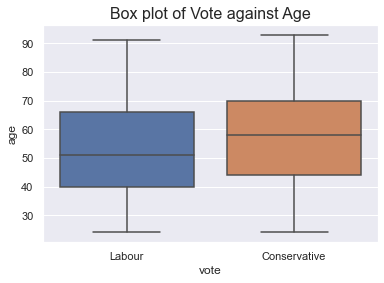

In [36]:
sns.boxplot(df2['vote'],df2['age']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Age',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against National Economic Condition')

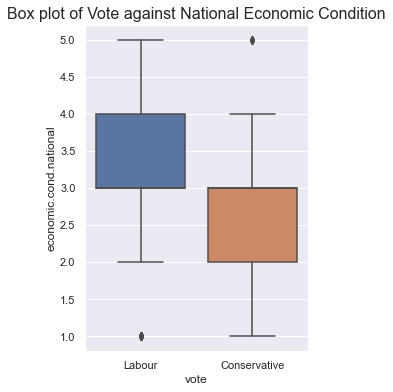

In [37]:
sns.boxplot(df2['vote'],df2['economic.cond.national']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against National Economic Condition',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against Household Economic Condition')

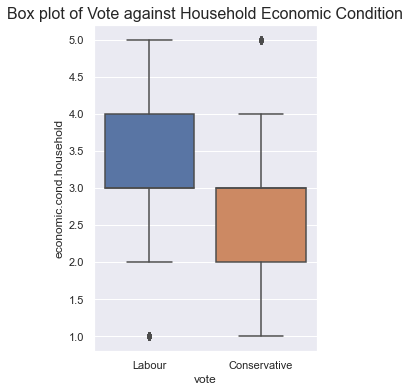

In [38]:
sns.boxplot(df2['vote'],df2['economic.cond.household']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Household Economic Condition',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against Blair')

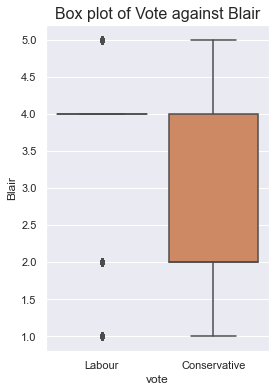

In [39]:
sns.boxplot(df2['vote'],df2['Blair']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Blair',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against Hague')

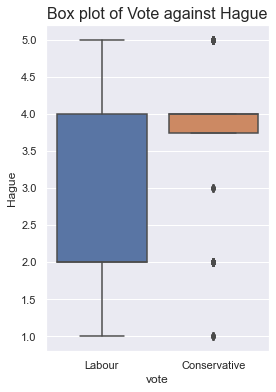

In [40]:
sns.boxplot(df2['vote'],df2['Hague']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Hague',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against Europe')

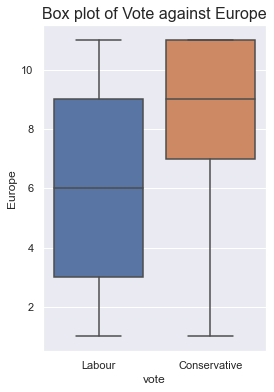

In [41]:
sns.boxplot(df2['vote'],df2['Europe']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Europe',fontsize=16)

Text(0.5, 1.0, 'Box plot of Vote against Political Knowledge')

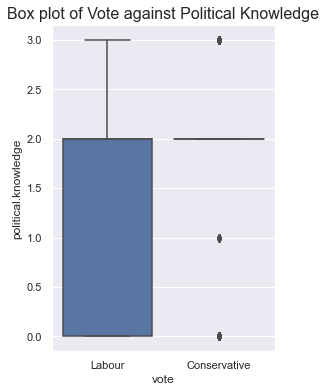

In [42]:
sns.boxplot(df2['vote'],df2['political.knowledge']);
plt.rcParams["figure.figsize"] = (4,6)
plt.title('Box plot of Vote against Political Knowledge',fontsize=16)

#### • Majority of the voters tend to lean towards the "Conservative Party"
#### • Mostly the voters with age group 45-70 tend to lean towards the "Conservative Party". On other hand majority of the voters with age group 40-68 tend to support "Labour Party".
#### • The voters supporting the Labour have an average to good assessment to National Economic Condition and Household Economic Condition and supporters of Conservative have fair assessment to the same.
#### • The voters supporting the Labour have a good assessment of Labour Leaders whereas supporters of Conservative have average assessment of the Labour Leaders.
#### • The voters supporting the Conservative have a good assessment of Conservative Leaders whereas supporters of Labour have fair to average assessment of the Conservative Leaders.
#### • The above two points indicate that supporters of each group has assessment to their own party not the other party.
#### • The conservative voters majorly tend to have a ‘Eurosceptic’ sentiment.
#### • The majority of the conservative voters tend to have good knowledge of the political parties.

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [43]:
df3 = df2_dummy.copy()

In [44]:
df3.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1.0,0.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0


- The Machine Learning algorithms that require the feature scaling are mostly KNN (K-Nearest  Neighbours), Neural Networks, Linear Regression, and Logistic Regression.
- The Machine learning algorithms that do not require feature scaling is mostly LDA (linear discriminant analysis) and non-linear ML algorithms such as Decision trees, Random Forest, AdaBoost, Naïve Bayes, etc
- Here, we are building a model, to predict which party a voter will vote for on the basis of the given information and to create an exit poll that will help in predicting overall win and seats covered by a particular party. In order to do our analysis we are expected to build model using Logistic Regression, LDA, KNN Model and Naïve Bayes Model. For now we are not scaling the data and will do the scaling based on the models we will runahead. Hence, as mentioned scaling might be necessary for two models and might not be necessary for theother two.

#### Data Split: Split the data into train and test (70:30)
##### Before Splitting we need to find the Target Variable and here we have target variable is "Vote"

In [45]:
X = df3.drop('vote_Labour',axis=1)
Y = df3.pop('vote_Labour')

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [47]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).
#### As discussed earlier Scaling of the data is not required for LDA whereas for Logistic Regression we need to scale the data. So we will first build LDA model and then Logistic Regression model.
### > *Build the LDA algorithm without scaling the predictor variables.*

In [48]:
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

### Classification Report
#### Linear Discriminant Analysis model Classification report for training set

In [49]:
YTrain_predictLDA = modelLDA.predict(X_train)
print('Classification Report of the train data:\n\n',metrics.classification_report(Y_train,YTrain_predictLDA))

Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



#### The report indicates that there are fewer false negatives predicted compared to false positives since the value for precision (0.86) is lower than that for recall (0.91). The F1 score is 0.89 which indicates that the model predicts decently well. The accuracy of the model is 83% but is a less reliable factor because of the imbalance in the categories in target variable.

In [50]:
YTest_predictLDA = modelLDA.predict(X_test)
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,YTest_predictLDA))

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



#### On the testing data, the model performs nearly same as the training data. The model is well fit. As for the training data, the model predicts fewer false negatives than false positives, indicated by the higher recall value (0.88) compared to precision (0.86). The F1 score is 0.87 which indicates that the model predicts well on the testing dataset. The accuracy of the model is 83% but is a less reliable factor because of the imbalance in the categories in target variable.
### --> *The model’s performance on the train and test data is similar, therefore the model has the right fit.*

### > *Build the Logistic Regression algorithm without scaling the predictor variables.*

In [51]:
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Classification Report
#### Logistic Regression model Classification report for training set

In [52]:
Ytrain_predictLR = modelLR.predict(X_train)
print('Classification Report of the train data:\n\n',metrics.classification_report(Y_train,Ytrain_predictLR),'\n')

Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



#### The report indicates that there are fewer false negatives predicted compared to false positives since the value for precision (0.86) is lower than that for recall (0.91). The F1 score is 0.89 which indicates that the model predicts decently well. The accuracy of the model is 83% but is a less reliable factor because of the imbalance in the categories in target variable.

#### Logistic Regression model Classification report for test set

In [53]:
Ytest_predictLR = modelLR.predict(X_test)
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,Ytest_predictLR),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



#### On the testing data, the model performs nearly same as the training data. The model is well fit. As for the training data, the model predicts fewer false negatives than false positives, indicated by the higher recall value (0.88) compared to precision (0.86). The F1 score is 0.87 which indicates that the model predicts well on the testing dataset. The accuracy of the model is 83% but is a less reliable factor because of the imbalance in the categories in target variable.
### --> *The model’s performance on the train and test data is similar, therefore the model has the right fit.*

###  > *Build the Logistic Regression algorithm after scaling the predictor variables.*
##### As the variable Age ranges from 24 to 93 so we need to scale this variable.

In [54]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [55]:
df2_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1.0,0.0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0,1.0
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0,1.0
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0


In [56]:
df2_dummy['age'] = std_scale.fit_transform(df2_dummy[['age']])
df2_dummy.head(5)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,-0.716161,3.0,3.0,4.0,1.0,2.0,2.0,1.0,0.0
1,-1.162118,4.0,4.0,4.0,4.0,5.0,2.0,1.0,1.0
2,-1.225827,4.0,4.0,5.0,2.0,3.0,2.0,1.0,1.0
3,-1.926617,4.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0
4,-0.843577,2.0,2.0,1.0,1.0,6.0,2.0,1.0,1.0


In [57]:
A = df2_dummy.drop('vote_Labour',axis=1)
B = df2_dummy.pop('vote_Labour')
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.30,random_state=1)

In [58]:
print('Number of rows and columns of the training set for the independent variables:',A_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',B_train.shape)
print('Number of rows and columns of the test set for the independent variables:',A_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',B_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [59]:
modelLRS = LogisticRegression(max_iter=1000)
modelLRS.fit(A_train, B_train)

LogisticRegression(max_iter=1000)

### Classification Report
#### Logistic Regression model Classification report for training set after scaling data

In [60]:
Btrain_predictLR = modelLRS.predict(A_train)
print('Classification Report of the train data:\n\n',metrics.classification_report(B_train,Btrain_predictLR),'\n')

Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



#### The report indicates that there are fewer false negatives predicted compared to false positives since the value for precision (0.86) is lower than that for recall (0.91). The F1 score is 0.89 which indicates that the model predicts decently well. The accuracy of the model is 83% but is a less reliable factor because of the imbalance in the categories in target variable.

#### Logistic Regression model Classification report for test set after scaling data

In [61]:
Btest_predictLR = modelLRS.predict(A_test)
print('Classification Report of the test data:\n\n',metrics.classification_report(B_test,Btest_predictLR),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



#### On the testing data, the model performs nearly same as the training data. The model is well fit. As seen in the training data, the model predicts fewer false negatives than false positives, indicated by the higher recall value (0.86) compared to precision (0.84). The F1 score is 0.85 which indicates that the model predicts well on the testing dataset. The accuracy of the model is 80% but is a less reliable factor because of the imbalance in the categories in target variable.
### --> *The model’s performance on the train and test data is similar, therefore the model has the right fit.*

#### Inference:
 - Accuracy of the model is more than 70%, which can be considered as a good accuracy score.
 - Train and Test data scores are mostly in line and the overall performance of both Logistic Regression and LDA model looks good.
 - Hence, it can be inferred that overall both models can be considered as a good model as of now.

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.
### > *Build the Naïve Bayes Model before scaling the predictor variables.*
#### In the Naïve Bayes model, the model is created using the Bayes theorem but there are some naïve assumptions made. It assumes that the presence of a particular feature in a class is not related to the presence of another feature. After building the model, the performance is checked using classification reports.

In [62]:
from  sklearn.naive_bayes import GaussianNB
from  sklearn import metrics

In [63]:
modelNB = GaussianNB()
modelNB.fit(X_train, Y_train)

GaussianNB()

### Classification Report
#### Naïve Bayes Model Classification report for training set after scaling data

In [64]:
Ytrain_predictNB = modelNB.predict(X_train)
print('Classification Report of the train set:\n\n',metrics.classification_report(Y_train,Ytrain_predictNB),'\n')

Classification Report of the train set:

               precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 



#### As in the above models, there are fewer false negatives compared to false positives since the precision (0.88) is lower than the recall (0.89). The F1 score of 0.88 indicates that the model performs well. The model has an accuracy of 83%.

#### Naïve Bayes Model Classification report for test set after scaling data

In [65]:
Ytest_predictNB = modelNB.predict(X_test)
print('Classification Report of the test set:\n\n',metrics.classification_report(Y_test,Ytest_predictNB),'\n')

Classification Report of the test set:

               precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



#### The precision (0.87) is equal to the recall (0.87), indicating that the number of false positives is equal to the number of false negatives. The F1 score is 0.87 indicating that the model performs well on the testing data as well. The accuracy is 82%.
### --> *The model’s performance on the train and test data is similar, therefore the model has the right fit.*

### > *Build the KNN Model after scaling the predictor variables.*
#### The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that thenew point is assigned a value based on how closely it resembles the points in the training set. KNN has the following basic steps:
    1. Calculate distance
    2. Find closest neighbors
    3. Vote for labels

In [66]:
from  sklearn.neighbors import KNeighborsClassifier
from  scipy.stats import zscore

In [67]:
# Var prior to scaling
A.var()

age                         1.000660
economic.cond.national      0.728713
economic.cond.household     0.785491
Blair                       1.380089
Hague                       1.519005
Europe                     10.883687
political.knowledge         1.175961
gender_male                 0.249099
dtype: float64

### Scaling the dataset and convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

In [68]:
A  = A.apply(zscore)
A.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [69]:
# Var post scaling
A.var()

age                        1.00066
economic.cond.national     1.00066
economic.cond.household    1.00066
Blair                      1.00066
Hague                      1.00066
Europe                     1.00066
political.knowledge        1.00066
gender_male                1.00066
dtype: float64

In [70]:
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.30,random_state=1)

In [71]:
modelKNN=KNeighborsClassifier()
modelKNN.fit(A_train,B_train)

KNeighborsClassifier()

### Classification Report
#### KNN Model Classification report for training set after scaling data

In [72]:
Btrain_predictKNN = modelKNN.predict(A_train)
print('Classification Report of the train data:\n\n',metrics.classification_report(B_train,Btrain_predictKNN),'\n')

Classification Report of the train data:

               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061
 



#### As in the above models, there are fewer false negatives compared to false positives since the precision (0.88) is lower than the recall (0.92). The F1 score of 0.90 indicates that the model performs well. The model has an accuracy of 86%.

In [73]:
Btest_predictKNN = modelKNN.predict(A_test)
print('Classification Report of the test data:\n\n',metrics.classification_report(B_test,Btest_predictKNN),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456
 



#### The precision (0.86) is equal to the recall (0.88), indicating that the number of false positives is less than number of false negatives. The F1 score is 0.87 indicating that the model performs well on the testing data as well. The accuracy is 83%.
#### Default value of n_neighbors is equal to 5. The above output of training and test data for KNN model is with k=5.
#### Building KNN model with n_neighbours= 1,3,5,7,......,19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error.*
#### Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours= 1,3,5...19 and find the model with lowest MCE.

In [74]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(A_train, B_train)
    scores=knn.score(A_test,B_test)
    ac_score.append(scores)

MCE=[1-x for x in ac_score]
MCE

[0.2149122807017544,
 0.19736842105263153,
 0.17324561403508776,
 0.1842105263157895,
 0.18201754385964908,
 0.17105263157894735,
 0.17763157894736847,
 0.16885964912280704,
 0.16666666666666663,
 0.17105263157894735]

In [75]:
ac_score

[0.7850877192982456,
 0.8026315789473685,
 0.8267543859649122,
 0.8157894736842105,
 0.8179824561403509,
 0.8289473684210527,
 0.8223684210526315,
 0.831140350877193,
 0.8333333333333334,
 0.8289473684210527]

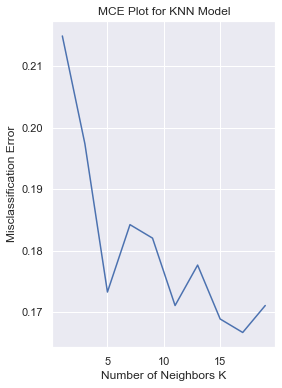

<Figure size 720x720 with 0 Axes>

In [115]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title("MCE Plot for KNN Model")
plt.figure(figsize=(10,10))
plt.show()

#### Hence, we can say that the lowest value of Misclassiﬁcation Error is at k=17. Also, we have seen above that accuracy score for KNN Model at k=17 is 83.33% which is considered a good accuracy score and the diﬀerence between train and test accuracies is less than 10%, it is a valid model. Therefore, we can say that the optimal value of k is 17 for this particular model.

### --> *The KNN model is a highly overfit model.*

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.
#### Model Tuning is the process of maximizing a model’s performance without overﬁtting or creating too high of variance. This is accomplished by selecting appropriate “hyperparameters.” which is crucial for model accuracy, but can be computationally challenging. Hyperparameters diﬀerence are not learned by the model automatically. Instead, these parameters are set manually. Below mentioned are the three most commonly used approaches.
    > Grid Search
    > Random Search
    > Bayesian Optimization
##### Here, we will use Grid Search Method for Model tuning

### -->*Naive Bayes Model with Tuning - Grid Search :*
##### Explaining the parameters used to ﬁnd the optimal combinations :
 - param_grid_NB: Dictionary that contains all of the parameters to try
 - var_smoothing : Stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.
 - np.logspace : Returns numbers spaced evenly on a log scale, starting from 0, ending at -9, and generating 100 samples.
 - estimator: Machine learning model of interest
 - verbose is the verbosity: the higher, the more messages; in this case, it is set to 5.
 - cv: cross-validation generator or an iterable, in this case, there is a 5-fold cross-validation.
 - n_jobs: Maximum number of iterations; in this case, it is set to -1 which implies that all CPUs are used

In [76]:
param_grid_NB = { 
    'var_smoothing': np.logspace(0,-9, num =100)}

In [77]:
modelNBGS = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_NB, cv=5, verbose=5)
modelNBGS.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.709 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.708 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.712 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.712 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.712 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.708 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.712 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.712 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.712 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.709 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

[CV 2/5] END .var_smoothing=0.01519911082952933;, score=0.797 total time=   0.0s
[CV 3/5] END .var_smoothing=0.01519911082952933;, score=0.811 total time=   0.0s
[CV 4/5] END .var_smoothing=0.01519911082952933;, score=0.807 total time=   0.0s
[CV 5/5] END .var_smoothing=0.01519911082952933;, score=0.821 total time=   0.0s
[CV 1/5] END var_smoothing=0.012328467394420659;, score=0.784 total time=   0.0s
[CV 2/5] END var_smoothing=0.012328467394420659;, score=0.821 total time=   0.0s
[CV 3/5] END var_smoothing=0.012328467394420659;, score=0.821 total time=   0.0s
[CV 4/5] END var_smoothing=0.012328467394420659;, score=0.807 total time=   0.0s
[CV 5/5] END var_smoothing=0.012328467394420659;, score=0.830 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.793 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.830 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.825 total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END var_smoothing=5.3366992312063123e-05;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=5.3366992312063123e-05;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=5.3366992312063123e-05;, score=0.821 total time=   0.0s
[CV 1/5] END var_smoothing=4.328761281083062e-05;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=4.328761281083062e-05;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=4.328761281083062e-05;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=4.328761281083062e-05;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=4.328761281083062e-05;, score=0.821 total time=   0.0s
[CV 1/5] END var_smoothing=3.511191734215127e-05;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=3.511191734215127e-05;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=3.511191734215127e-05;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=3.511191734215127e-05;, score=0.816 total time=   0.0s
[CV 5/5] END 

[CV 2/5] END var_smoothing=4.3287612810830526e-07;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=4.3287612810830526e-07;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=4.3287612810830526e-07;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=4.3287612810830526e-07;, score=0.811 total time=   0.0s
[CV 1/5] END var_smoothing=3.5111917342151277e-07;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=3.5111917342151277e-07;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=3.5111917342151277e-07;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=3.5111917342151277e-07;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=3.5111917342151277e-07;, score=0.811 total time=   0.0s
[CV 1/5] END var_smoothing=2.848035868435799e-07;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=2.848035868435799e-07;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=2.848035868435799e-07;, score=0.877 total time=   0.0s
[CV 4/5

[CV 1/5] END var_smoothing=3.5111917342151273e-09;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=3.5111917342151273e-09;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=3.5111917342151273e-09;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=3.5111917342151273e-09;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=3.5111917342151273e-09;, score=0.811 total time=   0.0s
[CV 1/5] END var_smoothing=2.848035868435805e-09;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=2.848035868435805e-09;, score=0.844 total time=   0.0s
[CV 3/5] END var_smoothing=2.848035868435805e-09;, score=0.877 total time=   0.0s
[CV 4/5] END var_smoothing=2.848035868435805e-09;, score=0.816 total time=   0.0s
[CV 5/5] END var_smoothing=2.848035868435805e-09;, score=0.811 total time=   0.0s
[CV 1/5] END var_smoothing=2.310129700083158e-09;, score=0.803 total time=   0.0s
[CV 2/5] END var_smoothing=2.310129700083158e-09;, score=0.844 total time=   0.0s
[CV 3/5] EN

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=5)

In [78]:
print("Tuned Hyperparameters :", modelNBGS.best_params_)
print("Accuracy :",modelNBGS.best_score_)

Tuned Hyperparameters : {'var_smoothing': 0.001}
Accuracy : 0.8332093188059172


### -->*Logistic Regression Model with Tuning - Grid Search :*
##### Explaining the parameters used to ﬁnd the optimal combinations :
 - estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
 - param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to selectthe best.
 - Scoring: It is used as a evaluating metric for the model performance to decide the best hyper parameters, if not speciﬁed then it uses estimator score.
 - solver: string ('liblinear' by default) that decides what solver to use for ﬁtting the model. Other options are'newton-cg', 'lbfgs', 'sag', and 'saga'. Here we are using newton-cg as it adaptively controls the accuracy of the solution without loss of the rapid convergence properties.
 - max_iter: Deﬁnes the maximum number of iterations by the solver during model ﬁtting. Here, we are using 10000.
 - penalty: It imposes a penalty to the logistic model for having too many variables. This results in shrinking the coeffcients of the less contributive variables toward zero.
 - verbose: Non-negative integer (0 by default) that deﬁnes the verbosity.
 - n_jobs: controls the number of cores on which the package will attempt to run in parallel.
 - cv: cross validation generator or an iterable, in this case, there is a 5-fold cross-validation.
 - scoring: choosing scoring F1 since it computes the Harmonic Mean between Recall and Precision, it tellsus whether both Type I and Type II error is low or high on an average

In [79]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg'],
      }

In [80]:
modelLRGS = GridSearchCV(estimator = LogisticRegression(), param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')
modelLRGS.fit(A_train, B_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['newton-cg']},
             scoring='f1')

In [81]:
print("Tuned Hyperparameters :", modelLRGS.best_params_)
print("Accuracy :",modelLRGS.best_score_)

Tuned Hyperparameters : {'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8840695085508018


 - The accuracy of 0.88 is now much better that the earlier accuracy of 0.83.
 - In this case, we let GridSearchCV use the entire dataset to derive the tuned parameters, and then we use the newly acquired values to build a new model.
 - Using GridSearchCV can save you quite a bit of effort in optimizing your machine learning model. But do note that GridSearchCV will only evaluate your hyperparameters based on what you have supplied in the parameter grid.

### -->*LDA Model with Tuning - Grid Search :*
##### Explaining the parameters used to ﬁnd the optimal combinations :
 - estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
 - param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to selectthe best.
 - Scoring: It is used as a evaluating metric for the model performance to decide the best hyper parameters, if not speciﬁed then it uses estimator score.
 - solver: string ('liblinear' by default) that decides what solver to use for ﬁtting the model. Other options are'svd', 'lsqr', 'eigen'.
 - n_jobs: controls the number of cores on which the package will attempt to run in parallel.
 - n_splits: The number of cross-validation splits (folds/iterations).
 - cv: cross validation generator or an iterable, in this case, there is a 5-fold cross-validation.

In [82]:
param_grid_LDA = dict()
param_grid_LDA['solver'] = ['svd', 'lsqr', 'eigen']
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [83]:
modelLDAGS = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid = param_grid_LDA, scoring='accuracy',
                          cv=cv, n_jobs=3)
modelLDAGS.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=3,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [84]:
print("Tuned Hyperparameters :", modelLDAGS.best_params_)
print("Accuracy :",modelLDAGS.best_score_)

Tuned Hyperparameters : {'solver': 'lsqr'}
Accuracy : 0.8303650149885382


### -->*KNN Model with Tuning - Grid Search :*
##### Explaining the parameters used to ﬁnd the optimal combinations :

In [85]:
param_grid_KNN = {
    "n_neighbors": range(1,20,2),
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","minkowski"],
    "leaf_size":range(1,50,5)
}
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [86]:
modelKNNGS = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = param_grid_KNN, scoring='accuracy',
                          cv=cv, n_jobs=1)
modelKNNGS.fit(A_train, B_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'leaf_size': range(1, 50, 5),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 20, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [87]:
print("Tuned Hyperparameters :", modelKNNGS.best_params_)
print("Accuracy :",modelKNNGS.best_score_)

Tuned Hyperparameters : {'leaf_size': 6, 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Accuracy : 0.8297390230999825


### Ensemble Machine Learning
#### It is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctlycombined we can obtain more accurate and/or robust models.The most popular methods for combining the predictions from diﬀerent models are:
    1. Bagging: Building multiple models (typically of the same type) from diﬀerent subsamples of the training dataset.
    2. Boosting: Building multiple models (typically of the same type) each of which learns to ﬁx the predictio nerrors of a prior model in the sequence of models.

#### >>> *Bagging Model*

In [88]:
from  sklearn.ensemble import BaggingClassifier
from  sklearn.tree import DecisionTreeClassifier

In [89]:
Bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, random_state=1)
Bagging_model.fit(A_train,B_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [90]:
Btrain_predictBG = Bagging_model.predict(A_train)
print('Classification Report of the train set:\n\n',metrics.classification_report(B_train,Btrain_predictBG),'\n')

Classification Report of the train set:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 



#### The model works extremely well on the training data and predicts all the values accurately just as the KNN model. The accuracy of the model is 100% and the model has a precision, recall and F1 score of 1.

In [91]:
Btest_predictBG = Bagging_model.predict(A_test)
print('Classification Report of the test set:\n\n',metrics.classification_report(B_test,Btest_predictBG),'\n')

Classification Report of the test set:

               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



#### The model predicts fewer false negatives than false positives i.e. more Conservative party votes are predicted wrong than Labour party votes since precision (0.86) is less than recall (0.88). The F1 score of 0.87 shows the model performs well on the training data but not well on the training data. The accuracy of the model is 82%

### The model is highly overfit.

#### >>> *Boosting Model*
#### There are three types of Boosting Algorithms which are as follows:
    1. AdaBoost (Adaptive Boosting) algorithm.
    2. Gradient Boosting algorithm.
    3. XG Boost algorithm.
    Here, we will use Adaboost and Gradient Boosting algorithm

#### >>> ADA Boosting Classifier model

In [92]:
from  sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(A_train,B_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [93]:
Btrain_predictAD = ADB_model.predict(A_train)
print('Classification Report of the train set:\n\n',metrics.classification_report(B_train,Btrain_predictAD),'\n')

Classification Report of the train set:

               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       307
         1.0       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



#### The model predicts fewer false negatives than false positives, i.e. there are more number of votes in Conservative party falsely predicted compared to those in Labour Party, since precision 0.88 is lower than recall 0.91. The F1 score s 0.90, indicating that the model performs well on the training data. The model has 85% accuracy.

In [94]:
Btest_predictAD = ADB_model.predict(A_test)
print('Classification Report of the test set:\n\n',metrics.classification_report(B_test,Btest_predictAD),'\n')

Classification Report of the test set:

               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       153
         1.0       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



#### The model, like on the training data, predicts more false positives than false negatives, indicated by the higher recall (0.88) and lower precision (0.84). The F1 score is 0.86, so the model performs well on the testing set but a little poorer than how it performs of the training set. The model has an accuracy of 81%
#### The model’s performance on the testing set is almost as good as on the training set. So the model is right fit.

#### >>> Gradient Boost Classifier model

In [95]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(A_train, B_train)

GradientBoostingClassifier(random_state=1)

In [96]:
Btrain_predictGB = gbc_model.predict(A_train)
print('Classification Report of the train set:\n\n',metrics.classification_report(B_train,Btrain_predictGB),'\n')

Classification Report of the train set:

               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       307
         1.0       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 



The model’s performance on the training set is very good.
It predicts fewer false negatives than false positives, i.e. there are more number of falsely predicted
Conservative votes than Labour votes, as precision (0.91) is less than recall (0.94).
The F1 score of 0.93 indicates that the performance of the model on the training data is very good.
The model has an accuracy of 89%.

In [97]:
Btest_predictGB = gbc_model.predict(A_test)
print('Classification Report of the test set:\n\n',metrics.classification_report(B_test,Btest_predictGB),'\n')

Classification Report of the test set:

               precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



Like on the training data, the model predicts fewer false negatives than false positives as the precision
(0.85) is less than the recall (0.91).
The F1 score is 0.88 which is good.
The accuracy of the model is 84%.

#### The model is slightly overfit.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### > Performance Metrics  - Logistic Regression
#### 1. Accuracy Score with Logistic Regression Model

In [98]:
modelLRS2_score = modelLRS.score(A_train, B_train)
print('Accuracy Score of Training Model is {}'.format(modelLRS2_score*100))
modelLRS1_score = modelLRS.score(A_test, B_test)
print('Accuracy Score of Test Model is {}'.format(modelLRS1_score*100))

Accuracy Score of Training Model is 82.5636192271442
Accuracy Score of Test Model is 79.82456140350878


#### 2.Confusion Matrix Comparison of Logistic Regression Training Data and Test Data

[[197 110]
 [ 66 688]]
[[111  42]
 [ 36 267]]


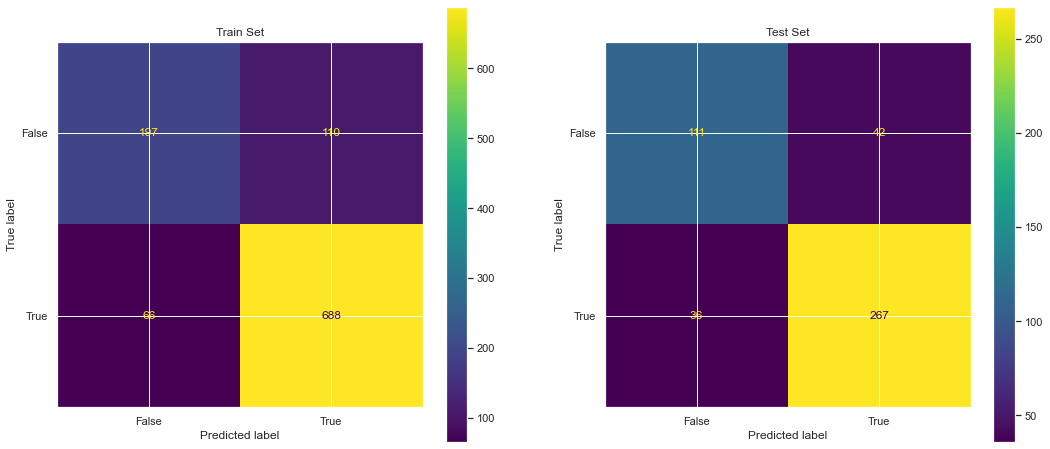

In [99]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(B_train,Btrain_predictLR))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_train,Btrain_predictLR), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(B_test,Btest_predictLR))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_test,Btest_predictLR), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with Logistic Regression.

In [100]:
# Training Data Probability Prediction
pred_prob_trainLR = modelLRS.predict_proba(A_train)
pred_prob_trainLR = pred_prob_trainLR[:,1]
print(pred_prob_trainLR)

# Test Data Probability Prediction
pred_prob_testLR = modelLRS.predict_proba(A_test)
pred_prob_testLR = pred_prob_testLR[:,1]
print(pred_prob_testLR)

[0.10656256 0.88820886 0.67270015 ... 0.79632995 0.66615906 0.91735464]
[0.51148815 0.81527432 0.97998716 0.15272011 0.94900724 0.85286886
 0.63090564 0.70110869 0.9297158  0.89720001 0.73926353 0.33764316
 0.98915447 0.35946544 0.80762448 0.42622617 0.9289308  0.91745606
 0.18011092 0.63103914 0.82107655 0.22418943 0.37952983 0.39168938
 0.89668069 0.61691603 0.95053092 0.97128088 0.78152011 0.11320014
 0.98405879 0.48418945 0.08084892 0.92708045 0.21298727 0.44858485
 0.5455853  0.92673188 0.12245454 0.92287195 0.93210602 0.81752424
 0.71452598 0.31161191 0.5068882  0.4774171  0.99372036 0.94494096
 0.21585015 0.61483707 0.80370349 0.64844226 0.9136866  0.97017984
 0.87643225 0.95158578 0.96366041 0.83762075 0.85453858 0.11416475
 0.42176794 0.97039795 0.5615646  0.66224487 0.31427901 0.49294649
 0.82856867 0.94551425 0.36457653 0.3551137  0.07596995 0.48542965
 0.40678568 0.83242093 0.73782852 0.6233824  0.96251152 0.96925216
 0.9680229  0.71079199 0.81335414 0.84669837 0.90686099 0

#### 4.AUC and ROC Logistic Regression.

AUC for the Training Data: 0.882
AUC for the Test Data: 0.862


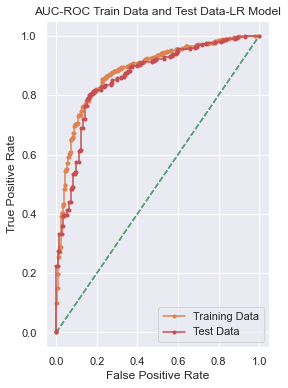

In [101]:
# AUC and ROC for the training data

# calculate AUC
aucLR1 = metrics.roc_auc_score(B_train,pred_prob_trainLR)
print('AUC for the Training Data: %.3f' % aucLR1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_train,pred_prob_trainLR)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucLR2 = metrics.roc_auc_score(B_test,pred_prob_testLR)
print('AUC for the Test Data: %.3f' % aucLR2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_test,pred_prob_testLR)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-LR Model")
plt.show()

Inference of Logistic Regression Model:
- Using the confusion matrix, the True Positive, False Positive, False Negative and True Negative values can be extracted which will add in the calculation of the accuracy score, precision score, recall score, and f1 score.
- Accuracy of the model is more than 80%, which can be considered as a good accuracy score.
- Train and Test data scores are mostly in line and the overall performance of model looks good. Hence, it can be inferred that overall this model can be considered as a good model.

### > Performance Metrics  -  LDA (Linear Discriminant Analysis)
#### 1. Accuracy Score with LDA (Linear Discriminant Analysis) Model

In [102]:
modelLDA1_score = modelLDA.score(X_train, Y_train)
print('Accuracy Score of Training Model is {}'.format(modelLDA1_score*100))
modelLDA2_score = modelLDA.score(X_test, Y_test)
print('Accuracy Score of Test Model is {}'.format(modelLDA2_score*100))

Accuracy Score of Training Model is 83.41187558906692
Accuracy Score of Test Model is 83.1140350877193


#### 2.Confusion Matrix Comparison of LDA (Linear Discriminant Analysis) Training Data and Test Data

[[200 107]
 [ 69 685]]
[[111  42]
 [ 35 268]]


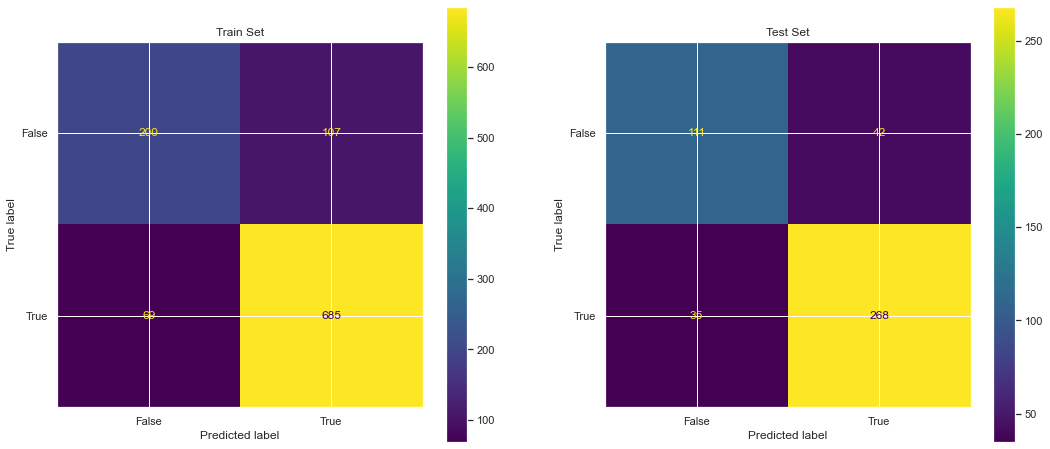

In [103]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(Y_train,YTrain_predictLDA))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(Y_train,YTrain_predictLDA), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(Y_test,YTest_predictLDA))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(Y_test,YTest_predictLDA), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with LDA (Linear Discriminant Analysis)

In [104]:
# Training Data Probability Prediction
pred_prob_trainLDA = modelLDA.predict_proba(X_train)
pred_prob_trainLDA = pred_prob_trainLDA[:,1]
print(pred_prob_trainLDA)

# Test Data Probability Prediction
pred_prob_testLDA = modelLDA.predict_proba(X_test)
pred_prob_testLDA = pred_prob_testLDA[:,1]
print(pred_prob_testLR)

[0.04973366 0.92243861 0.69491333 ... 0.77989739 0.78940481 0.98130104]
[0.51148815 0.81527432 0.97998716 0.15272011 0.94900724 0.85286886
 0.63090564 0.70110869 0.9297158  0.89720001 0.73926353 0.33764316
 0.98915447 0.35946544 0.80762448 0.42622617 0.9289308  0.91745606
 0.18011092 0.63103914 0.82107655 0.22418943 0.37952983 0.39168938
 0.89668069 0.61691603 0.95053092 0.97128088 0.78152011 0.11320014
 0.98405879 0.48418945 0.08084892 0.92708045 0.21298727 0.44858485
 0.5455853  0.92673188 0.12245454 0.92287195 0.93210602 0.81752424
 0.71452598 0.31161191 0.5068882  0.4774171  0.99372036 0.94494096
 0.21585015 0.61483707 0.80370349 0.64844226 0.9136866  0.97017984
 0.87643225 0.95158578 0.96366041 0.83762075 0.85453858 0.11416475
 0.42176794 0.97039795 0.5615646  0.66224487 0.31427901 0.49294649
 0.82856867 0.94551425 0.36457653 0.3551137  0.07596995 0.48542965
 0.40678568 0.83242093 0.73782852 0.6233824  0.96251152 0.96925216
 0.9680229  0.71079199 0.81335414 0.84669837 0.90686099 0

#### 4.AUC and ROC LDA (Linear Discriminant Analysis)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


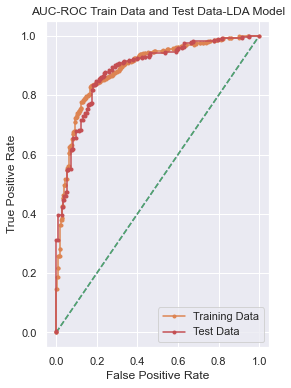

In [105]:
# AUC and ROC for the training data

# calculate AUC
aucLDA1 = metrics.roc_auc_score(Y_train,pred_prob_trainLDA)
print('AUC for the Training Data: %.3f' % aucLDA1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_trainLDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucLDA2 = metrics.roc_auc_score(Y_test,pred_prob_testLDA)
print('AUC for the Test Data: %.3f' % aucLDA2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_testLDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-LDA Model")
plt.show()

Inference of Linear Discriminant Analysis Model
- Accuracy of the model is more than 80%, which can be considered as agood accuracy score.
- Train and Test data scores are mostly in line and the overall performance of model looks good. Hence, itcan be inferred that overall this model can be considered as a good model.

### > Performance Metrics  - KNN Model
#### 1. Accuracy Score with KNN Model

In [106]:
modelKNN1_score = modelKNN.score(A_train, B_train)
print('Accuracy Score of Training Model is {}'.format(modelKNN1_score*100))
modelKNN2_score = modelKNN.score(A_test, B_test)
print('Accuracy Score of Test Model is {}'.format(modelKNN2_score*100))

Accuracy Score of Training Model is 85.67389255419415
Accuracy Score of Test Model is 82.67543859649122


#### 2.Confusion Matrix Comparison of KNN Model Training Data and Test Data

[[217  90]
 [ 62 692]]
[[109  44]
 [ 35 268]]


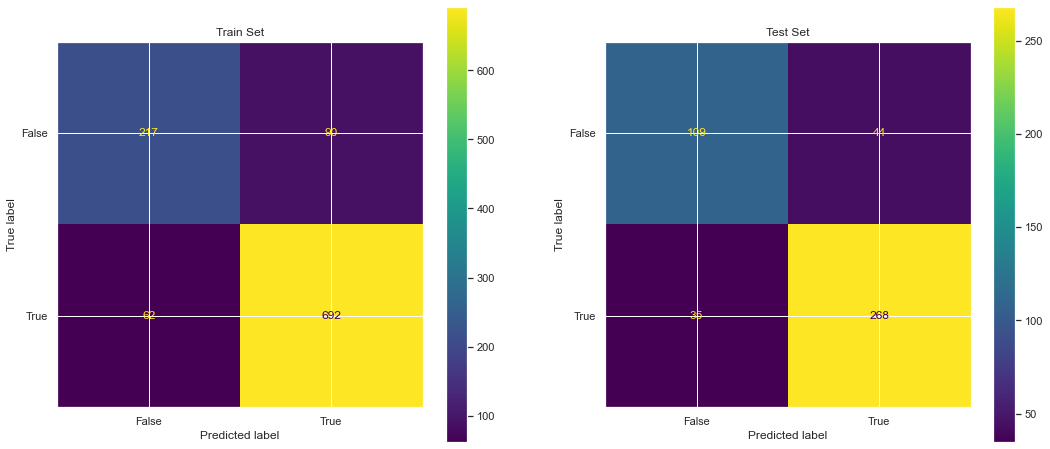

In [107]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(B_train,Btrain_predictKNN))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_train,Btrain_predictKNN), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(B_test,Btest_predictKNN))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_test,Btest_predictKNN), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with KNN Model

In [108]:
# Training Data Probability Prediction
pred_prob_trainKN = modelKNN.predict_proba(A_train)
pred_prob_trainKN = pred_prob_trainKN[:,1]
print(pred_prob_trainKN)

# Test Data Probability Prediction
pred_prob_testKN = modelKNN.predict_proba(A_test)
pred_prob_testKN = pred_prob_testKN[:,1]
print(pred_prob_testKN)

[0.  0.8 0.6 ... 0.8 0.6 1. ]
[0.  1.  1.  0.2 1.  1.  0.2 0.4 1.  0.8 0.8 0.6 1.  0.4 0.8 1.  0.8 1.
 0.  0.8 1.  1.  0.  0.4 1.  0.6 1.  1.  1.  0.  1.  0.4 0.2 1.  0.4 0.4
 0.4 1.  0.  1.  1.  0.8 0.4 0.2 0.  0.4 1.  1.  0.2 0.8 0.6 0.6 1.  1.
 1.  1.  1.  1.  0.8 0.  0.4 1.  0.6 0.6 1.  0.6 0.8 1.  0.  0.2 0.  0.
 0.4 1.  0.8 0.6 1.  1.  1.  1.  0.6 1.  1.  1.  0.2 0.8 0.8 1.  0.4 0.6
 0.2 0.8 1.  0.6 0.2 0.6 1.  0.6 0.8 1.  0.  0.4 0.8 1.  1.  1.  0.8 0.8
 0.8 0.8 1.  0.8 1.  0.  0.4 1.  0.4 1.  1.  0.  1.  0.8 0.  0.4 0.8 0.8
 1.  1.  0.4 0.8 1.  0.4 1.  0.6 0.  1.  0.4 1.  0.  1.  1.  0.4 1.  0.6
 0.6 1.  0.  0.  0.8 0.  0.2 1.  0.4 0.8 1.  1.  0.8 1.  0.8 1.  0.2 1.
 1.  1.  0.2 0.6 0.6 0.4 1.  0.6 0.6 0.2 1.  1.  0.8 0.4 1.  0.2 0.6 1.
 0.2 1.  0.2 0.6 0.8 0.2 0.  1.  0.6 1.  1.  1.  1.  1.  0.8 0.  1.  0.2
 1.  1.  0.4 1.  1.  0.6 0.  0.4 0.8 1.  1.  1.  1.  1.  1.  0.8 0.4 1.
 0.  1.  1.  1.  0.4 0.6 0.8 0.4 1.  0.2 0.4 0.2 1.  1.  0.8 0.  0.8 0.
 0.8 1.  0.  0.4 1.  0.  0.6

#### 4.AUC and ROC KNN Model

AUC for the Training Data: 0.929
AUC for the Test Data: 0.870


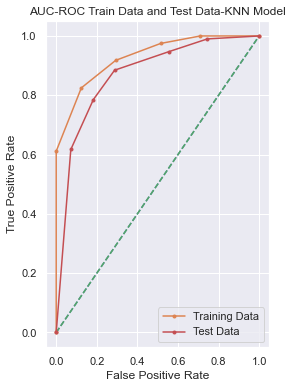

In [109]:
# AUC and ROC for the training data

# calculate AUC
aucKN1 = metrics.roc_auc_score(B_train,pred_prob_trainKN)
print('AUC for the Training Data: %.3f' % aucKN1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_train,pred_prob_trainKN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucKN2 = metrics.roc_auc_score(B_test,pred_prob_testKN)
print('AUC for the Test Data: %.3f' % aucKN2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_test,pred_prob_testKN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-KNN Model")
plt.show()

### > Performance Metrics  - Naive Bayes Model
#### 1. Accuracy Score with Naive Bayes Model

In [110]:
modelNB1_score = modelNB.score(X_train, Y_train)
print('Accuracy Score of Training Model is {}'.format(modelNB1_score*100))
modelNB2_score = modelNB.score(X_test, Y_test)
print('Accuracy Score of Test Model is {}'.format(modelNB2_score*100))

Accuracy Score of Training Model is 83.41187558906692
Accuracy Score of Test Model is 82.23684210526315


#### 2.Confusion Matrix Comparison of Naive Bayes Model Training Data and Test Data

[[212  95]
 [ 81 673]]
[[112  41]
 [ 40 263]]


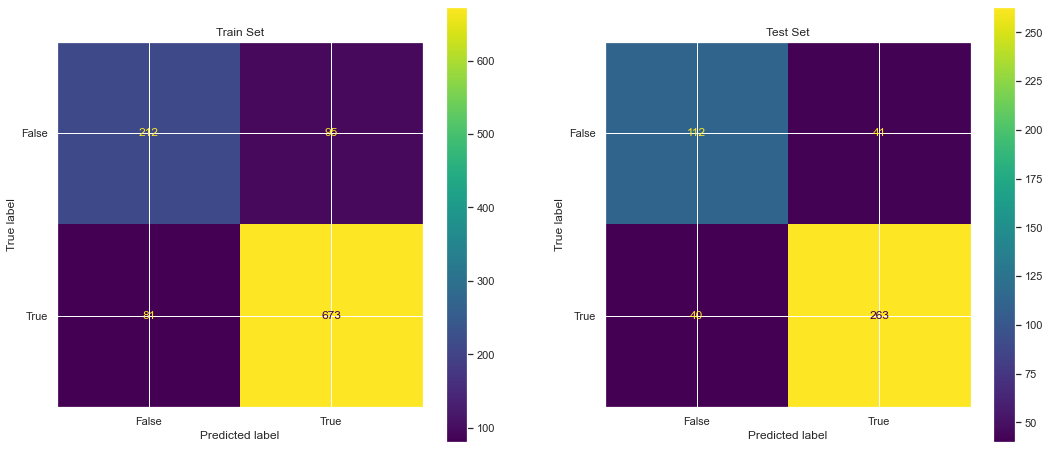

In [111]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(Y_train,Ytrain_predictNB))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(Y_train,Ytrain_predictNB), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(Y_test,Ytest_predictNB))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(Y_test,Ytest_predictNB), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with Naive Bayes Model

In [112]:
# Training Data Probability Prediction
pred_prob_trainNB = modelNB.predict_proba(X_train)
pred_prob_trainNB = pred_prob_trainNB[:,1]
print(pred_prob_trainNB)

# Test Data Probability Prediction
pred_prob_testNB = modelNB.predict_proba(X_test)
pred_prob_testNB = pred_prob_testNB[:,1]
print(pred_prob_testNB)

[0.01518578 0.9360043  0.73295319 ... 0.79984938 0.66578495 0.99813192]
[0.44608498 0.86826001 0.99975334 0.05271024 0.96973107 0.97574979
 0.63788604 0.79037567 0.98879392 0.93393778 0.95740604 0.37225269
 0.99742537 0.23377063 0.78395395 0.60862623 0.9901905  0.99393867
 0.02406868 0.63960044 0.93790631 0.05553058 0.14938331 0.34544031
 0.95038336 0.59444101 0.99807459 0.99487965 0.67598314 0.03855628
 0.99872915 0.16848834 0.00897285 0.96507932 0.48636292 0.29419598
 0.4058425  0.99060447 0.02236408 0.99247066 0.96615377 0.95885913
 0.79083771 0.1934616  0.34348668 0.28642577 0.99971401 0.97296164
 0.04654548 0.56553378 0.76893925 0.63198392 0.99794883 0.99162716
 0.96436811 0.99657624 0.99599861 0.93675296 0.90613679 0.01406778
 0.38190491 0.99923395 0.48600485 0.88365386 0.35827559 0.31477914
 0.80405639 0.99926666 0.29416743 0.52797006 0.00495898 0.18733042
 0.83002187 0.88488147 0.66220209 0.56186908 0.99858939 0.99867208
 0.99959146 0.92007023 0.98536707 0.98956034 0.99368675 0

#### 4.AUC and ROC Naive Bayes Model

AUC for the Training Data: 0.889
AUC for the Test Data: 0.876


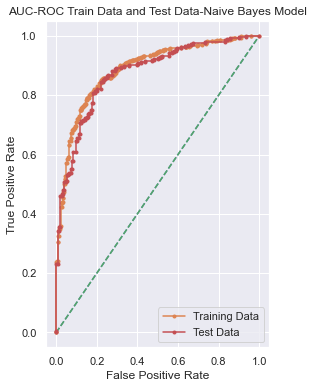

In [113]:
# AUC and ROC for the training data

# calculate AUC
aucNB1 = metrics.roc_auc_score(Y_train,pred_prob_trainNB)
print('AUC for the Training Data: %.3f' % aucNB1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_trainNB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucNB2 = metrics.roc_auc_score(Y_test,pred_prob_testNB)
print('AUC for the Test Data: %.3f' % aucNB2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_testNB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-Naive Bayes Model")
plt.show()

The ROC curves for training and testing data are close to each other, i.e. the model performs nearly same on both the data.
The AUC score for the training data is 0.89 and for testing data is 0.88.

### > Performance Metrics  - Bagging Model
#### 1. Accuracy Score with Bagging Model

In [114]:
modelBG1_score = Bagging_model.score(A_train, B_train)
print('Accuracy Score of Training Model is {}'.format(modelBG1_score*100))
modelBG2_score = Bagging_model.score(A_test, B_test)
print('Accuracy Score of Test Model is {}'.format(modelBG2_score*100))

Accuracy Score of Training Model is 100.0
Accuracy Score of Test Model is 82.01754385964912


#### 2.Confusion Matrix Comparison of Bagging Model Training Data and Test Data

[[307   0]
 [  0 754]]
[[108  45]
 [ 37 266]]


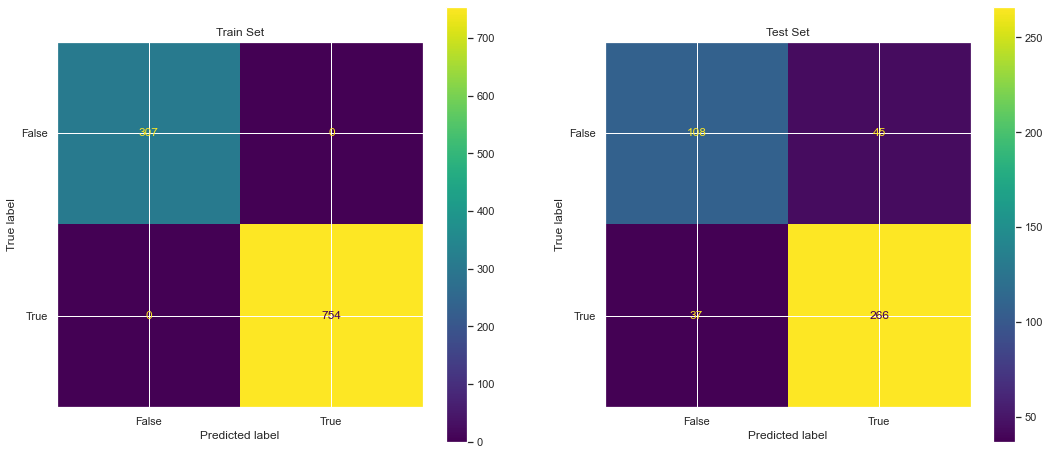

In [115]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(B_train,Btrain_predictBG))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_train,Btrain_predictBG), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(B_test,Btest_predictBG))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_test,Btest_predictBG), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with Bagging Model

In [116]:
# Training Data Probability Prediction
pred_prob_trainBG = Bagging_model.predict_proba(A_train)
pred_prob_trainBG = pred_prob_trainBG[:,1]
print(pred_prob_trainBG)

# Test Data Probability Prediction
pred_prob_testBG = Bagging_model.predict_proba(A_test)
pred_prob_testBG = pred_prob_testBG[:,1]
print(pred_prob_testBG)

[0.01 0.97 0.24 ... 0.89 0.9  1.  ]
[0.23 0.47 1.   0.42 0.97 1.   0.4  0.51 1.   0.72 0.63 0.49 1.   0.22
 0.79 0.84 0.92 1.   0.05 0.6  0.96 0.68 0.06 0.74 1.   0.46 1.   0.95
 0.75 0.04 1.   0.3  0.35 1.   0.41 0.28 0.1  1.   0.02 1.   0.99 0.98
 0.48 0.38 0.25 0.42 1.   1.   0.03 0.81 0.86 0.68 1.   1.   0.99 0.94
 1.   0.99 0.34 0.   0.73 0.92 0.76 0.79 0.71 0.7  0.83 1.   0.25 0.39
 0.07 0.18 0.62 0.93 0.81 0.55 1.   0.98 1.   0.98 0.93 0.95 1.   0.98
 0.41 0.73 0.99 1.   0.27 0.61 0.07 0.53 0.96 0.84 0.27 0.72 0.64 0.02
 0.97 1.   0.02 0.22 0.88 1.   1.   1.   0.96 0.78 0.85 0.82 0.89 0.95
 0.95 0.14 0.06 0.97 0.4  0.96 0.98 0.04 0.86 1.   0.12 0.28 0.98 0.96
 0.97 1.   0.51 0.95 0.92 0.56 1.   0.56 0.15 0.86 0.28 0.64 0.03 1.
 1.   0.44 0.78 0.75 0.7  0.7  0.13 0.02 1.   0.32 0.23 0.41 0.54 0.99
 1.   0.98 0.86 0.89 0.99 1.   0.39 1.   0.99 0.97 0.18 0.22 0.63 0.54
 0.97 0.57 0.39 0.08 0.99 1.   0.88 0.07 0.93 0.27 0.8  1.   0.36 0.83
 0.02 0.71 0.7  0.45 0.02 0.98 0.84 0.96 1.

#### 4.AUC and ROC Bagging Model

AUC for the Training Data: 1.000
AUC for the Test Data: 0.881


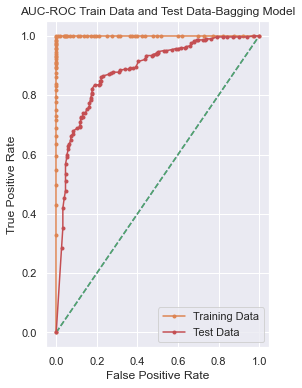

In [117]:
# AUC and ROC for the training data

# calculate AUC
aucBG1 = metrics.roc_auc_score(B_train,pred_prob_trainBG)
print('AUC for the Training Data: %.3f' % aucBG1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_train,pred_prob_trainBG)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucBG2 = metrics.roc_auc_score(B_test,pred_prob_testBG)
print('AUC for the Test Data: %.3f' % aucBG2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_test,pred_prob_testBG)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-Bagging Model")
plt.show()

### > Performance Metrics  - ADA Boosting Classifier
#### 1. Accuracy Score with ADA Boosting Classifier

In [118]:
modelADB1_score = ADB_model.score(A_train, B_train)
print('Accuracy Score of Training Model is {}'.format(modelADB1_score*100))
modelADB2_score = ADB_model.score(A_test, B_test)
print('Accuracy Score of Test Model is {}'.format(modelADB2_score*100))

Accuracy Score of Training Model is 85.01413760603205
Accuracy Score of Test Model is 81.35964912280701


#### 2.Confusion Matrix Comparison of ADA Boosting Classifier Training Data and Test Data

[[214  93]
 [ 66 688]]
[[103  50]
 [ 35 268]]


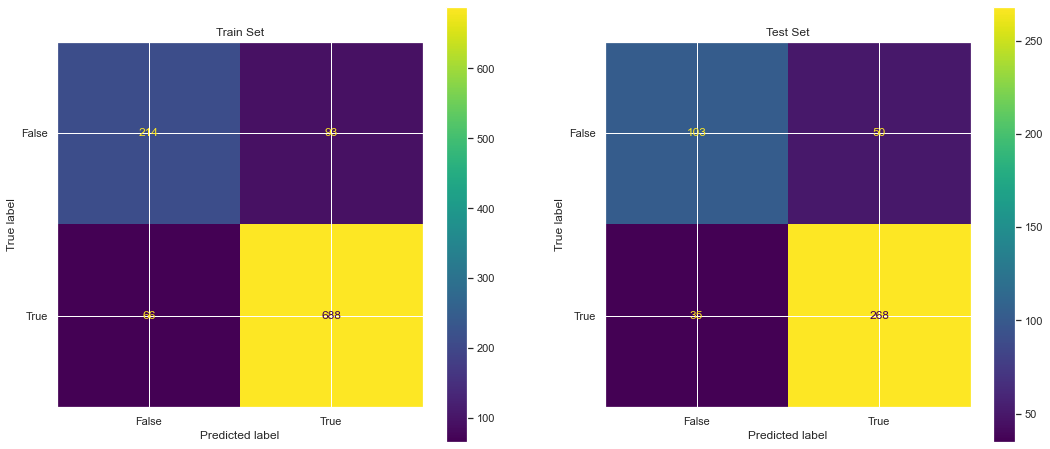

In [119]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(B_train,Btrain_predictAD))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_train,Btrain_predictAD), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(B_test,Btest_predictAD))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_test,Btest_predictAD), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with ADA Boosting Classifier

In [120]:
# Training Data Probability Prediction
pred_prob_trainAD = ADB_model.predict_proba(A_train)
pred_prob_trainAD = pred_prob_trainAD[:,1]
print(pred_prob_trainAD)

# Test Data Probability Prediction
pred_prob_testAD = ADB_model.predict_proba(A_test)
pred_prob_testAD = pred_prob_testAD[:,1]
print(pred_prob_testAD)

[0.49884778 0.50676191 0.5028942  ... 0.51122736 0.50661363 0.51076744]
[0.49782711 0.50324543 0.51994275 0.49447503 0.50613243 0.5066929
 0.50038752 0.50409168 0.51064083 0.50806643 0.50523424 0.49898805
 0.5182658  0.49794841 0.50377689 0.50004417 0.50235418 0.52001959
 0.4968882  0.49930235 0.50732876 0.49506442 0.49620437 0.49956346
 0.50553378 0.50091377 0.51344977 0.51191721 0.50185786 0.49178574
 0.51074562 0.49872703 0.49747861 0.5082364  0.50496443 0.49939674
 0.49857755 0.50941855 0.49255531 0.50933939 0.50737682 0.50655268
 0.50228531 0.49460107 0.5002339  0.4968939  0.51723377 0.50999285
 0.49349738 0.50154467 0.50971702 0.50240526 0.51179334 0.51161855
 0.5075788  0.51202683 0.51449106 0.50500901 0.50742012 0.49154407
 0.4975126  0.51867213 0.50264287 0.50226814 0.50038488 0.50112791
 0.50376246 0.5127647  0.5014024  0.50081583 0.49157639 0.49808202
 0.50434297 0.50849767 0.50183464 0.49979126 0.51418189 0.51790647
 0.52462689 0.50289352 0.51149256 0.5084478  0.50939291 0.

#### 4.AUC and ROC ADA Boosting Classifier

AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


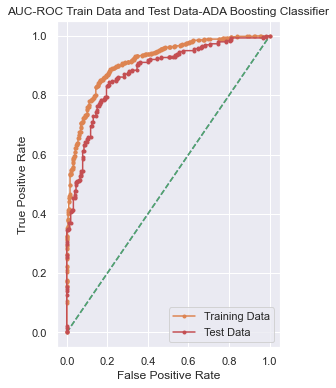

In [121]:
# AUC and ROC for the training data

# calculate AUC
aucAD1 = metrics.roc_auc_score(B_train,pred_prob_trainAD)
print('AUC for the Training Data: %.3f' % aucAD1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_train,pred_prob_trainAD)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucAD2 = metrics.roc_auc_score(B_test,pred_prob_testAD)
print('AUC for the Test Data: %.3f' % aucAD2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_test,pred_prob_testAD)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-ADA Boosting Classifier")
plt.show()

### > Performance Metrics  - Gradient Boost Classifier
#### 1. Accuracy Score with Gradient Boost Classifier

In [122]:
modelGBC1_score = gbc_model.score(A_train, B_train)
print('Accuracy Score of Training Model is {}'.format(modelGBC1_score*100))
modelGBC2_score = gbc_model.score(A_test, B_test)
print('Accuracy Score of Test Model is {}'.format(modelGBC2_score*100))

Accuracy Score of Training Model is 89.25541941564562
Accuracy Score of Test Model is 83.55263157894737


#### 2.Confusion Matrix Comparison of Gradient Boost Classifier Training Data and Test Data

[[239  68]
 [ 46 708]]
[[105  48]
 [ 27 276]]


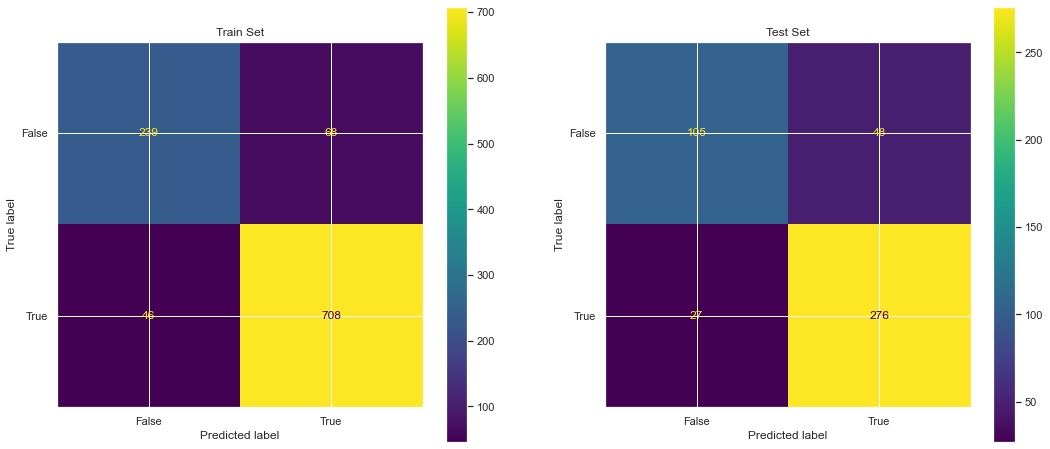

In [123]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
print(metrics.confusion_matrix(B_train,Btrain_predictGB))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_train,Btrain_predictGB), 
display_labels = [False, True]).plot(ax=ax[0])

print(metrics.confusion_matrix(B_test,Btest_predictGB))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(B_test,Btest_predictGB), 
display_labels = [False, True]).plot(ax=ax[1]);

#### 3.Probability prediction for the training and test data with Gradient Boost Classifier

In [124]:
# Training Data Probability Prediction
pred_prob_trainGB = gbc_model.predict_proba(A_train)
pred_prob_trainGB = pred_prob_trainGB[:,1]
print(pred_prob_trainGB)

# Test Data Probability Prediction
pred_prob_testGB = gbc_model.predict_proba(A_test)
pred_prob_testGB = pred_prob_testGB[:,1]
print(pred_prob_testGB)

[0.16632954 0.92809482 0.66442645 ... 0.97351274 0.88661555 0.99275616]
[0.3093434  0.76305798 0.99889775 0.15975254 0.88835647 0.96820369
 0.41813726 0.78759057 0.97342252 0.90128019 0.86968711 0.39394384
 0.98711523 0.22147284 0.90510523 0.72916188 0.82164612 0.99508271
 0.18913336 0.58759137 0.96415744 0.53367706 0.24172084 0.64336826
 0.96002476 0.53836339 0.98051782 0.97205651 0.62024967 0.05309303
 0.98498422 0.56188035 0.14963024 0.97894691 0.57620338 0.41935379
 0.39272273 0.97411173 0.06427096 0.96933348 0.95670594 0.92437794
 0.62398168 0.24782255 0.37525087 0.33798349 0.99294823 0.98333493
 0.11821839 0.56773292 0.94510742 0.73731873 0.99174799 0.99008247
 0.90970958 0.98067093 0.98860251 0.94525028 0.84374507 0.06392733
 0.26760163 0.96933717 0.80751299 0.77715221 0.62483997 0.7296788
 0.86250412 0.99499953 0.2648295  0.56360179 0.09731005 0.36448753
 0.65830164 0.937313   0.68552382 0.485282   0.98921945 0.99525994
 0.99515878 0.85960743 0.81187297 0.96960335 0.97754083 0.

#### 4.AUC and ROC Gradient Boost Classifier

AUC for the Training Data: 0.951
AUC for the Test Data: 0.899


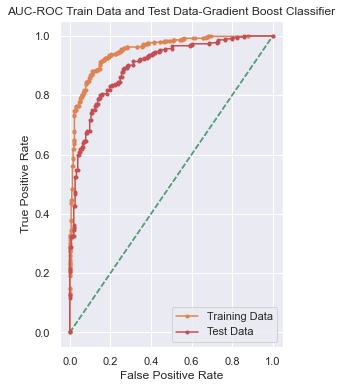

In [125]:
# AUC and ROC for the training data

# calculate AUC
aucGB1 = metrics.roc_auc_score(B_train,pred_prob_trainGB)
print('AUC for the Training Data: %.3f' % aucGB1)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_train,pred_prob_trainGB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
aucGB2 = metrics.roc_auc_score(B_test,pred_prob_testGB)
print('AUC for the Test Data: %.3f' % aucGB2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(B_test,pred_prob_testGB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Train Data and Test Data-Gradient Boost Classifier")
plt.show()

### 1.8 Based on these predictions, what are the insights?

In [ ]:
Word Cloud 46.48